In [ ]:
#import necessarynecessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install Keras


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [ ]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'

    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

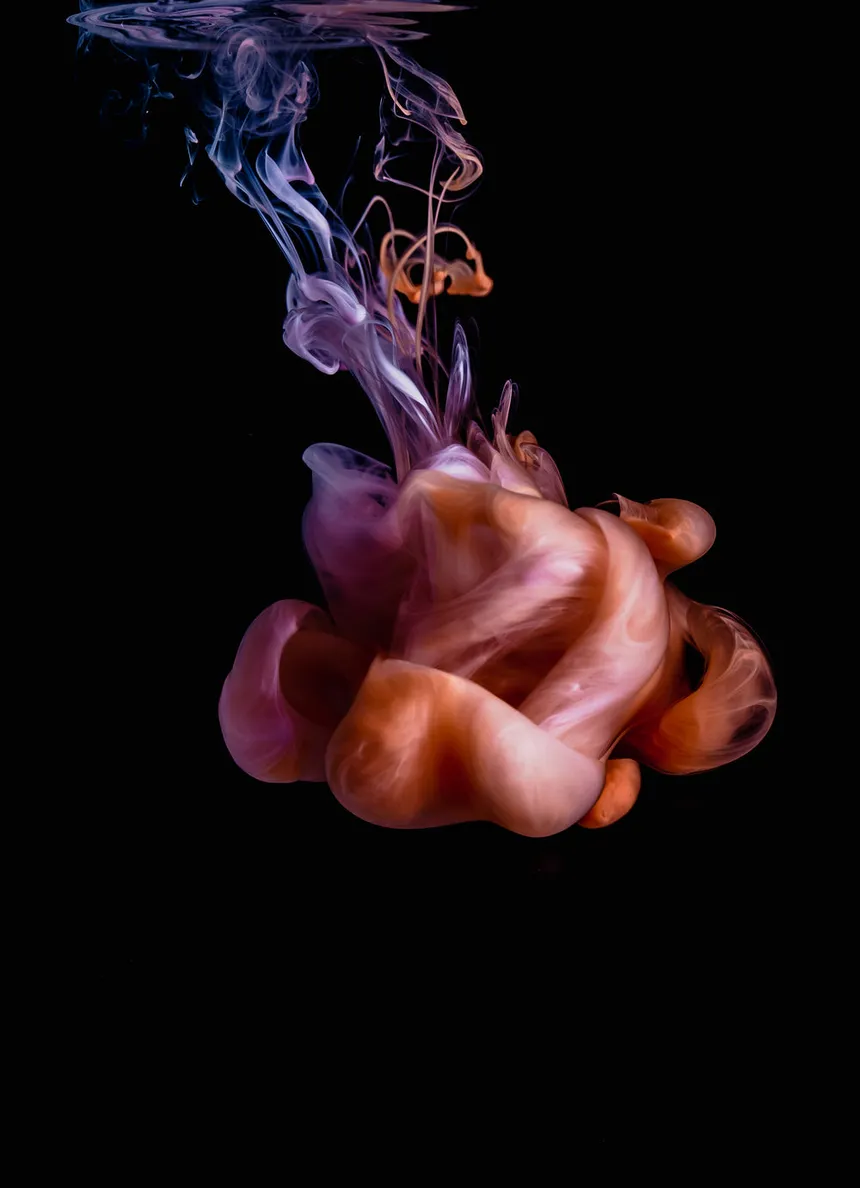

In [ ]:
real_image_path = '/content/two-tone-ink-cloud.webp'
Image.open(real_image_path)

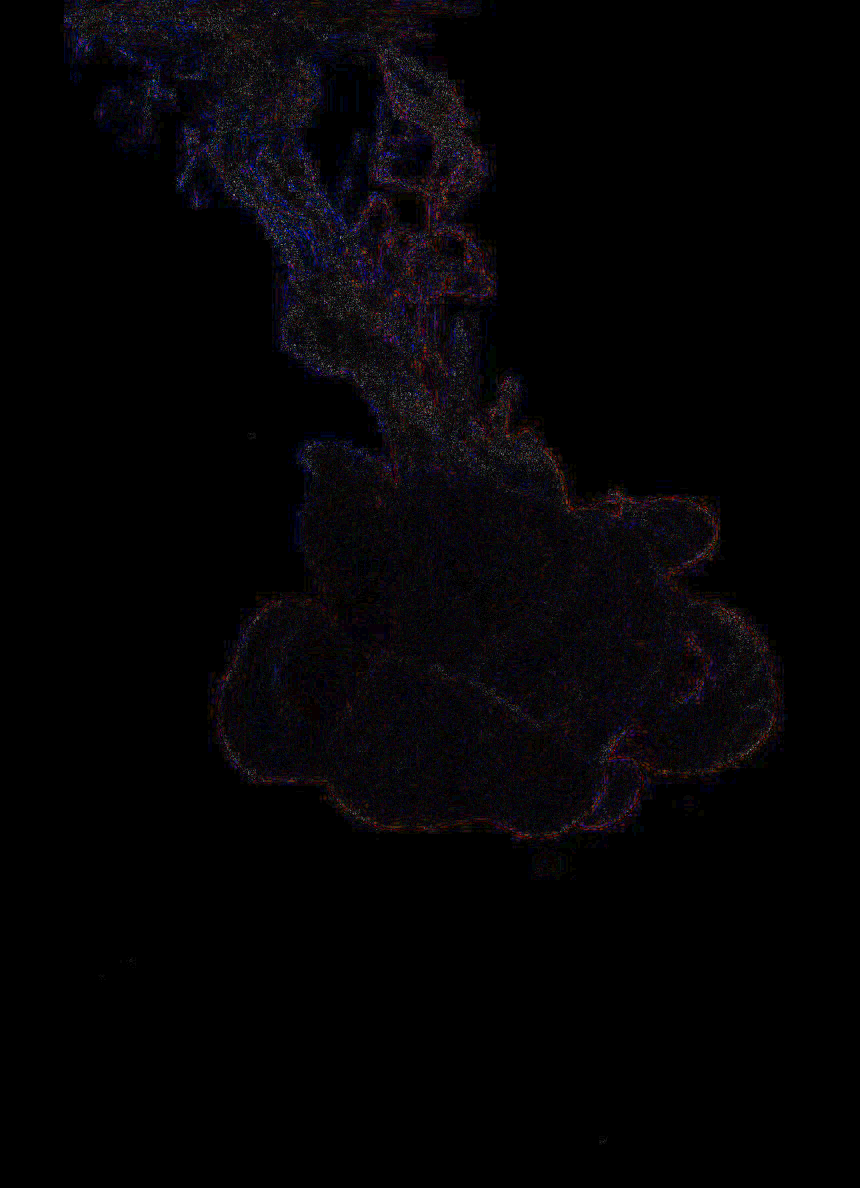

In [ ]:
convert_to_ela_image(real_image_path, 90)

In [ ]:
# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

img_r=skimage.io.imread('/content/two-tone-ink-cloud.webp')
img_r=skimage.img_as_float(img_r) #converting image as float

#sigma=0.35 #noise
#imgn=random_noise(img,var=sigma**2) # adding noise

sigma_est=estimate_sigma(img_r,multichannel=True,average_sigmas=True)  #Noise estimation

# Denoising using Bayes
img_bayes=denoise_wavelet(img_r,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


#Denoising using Visushrink
img_visushrink=denoise_wavelet(img_r,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)

<ipython-input-12-e94cfe3247e4>:13: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est=estimate_sigma(img_r,multichannel=True,average_sigmas=True)  #Noise estimation
<ipython-input-12-e94cfe3247e4>:16: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_bayes=denoise_wavelet(img_r,method='BayesShrink',mode='soft',wavelet_levels=3,
<ipython-input-12-e94cfe3247e4>:21: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_visushrink=denoise_wavelet(img_r,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary ef

In [ ]:
import cv2
psnr_noisy = cv2.PSNR(img_r,img_r)
psnr_noisy

361.20199909921956

In [ ]:
psnr_bayes = cv2.PSNR(img_r,img_bayes)
psnr_bayes

355.6122633654433

In [ ]:
psnr_visu = cv2.PSNR(img_r,img_visushrink)
psnr_bayes

355.6122633654433

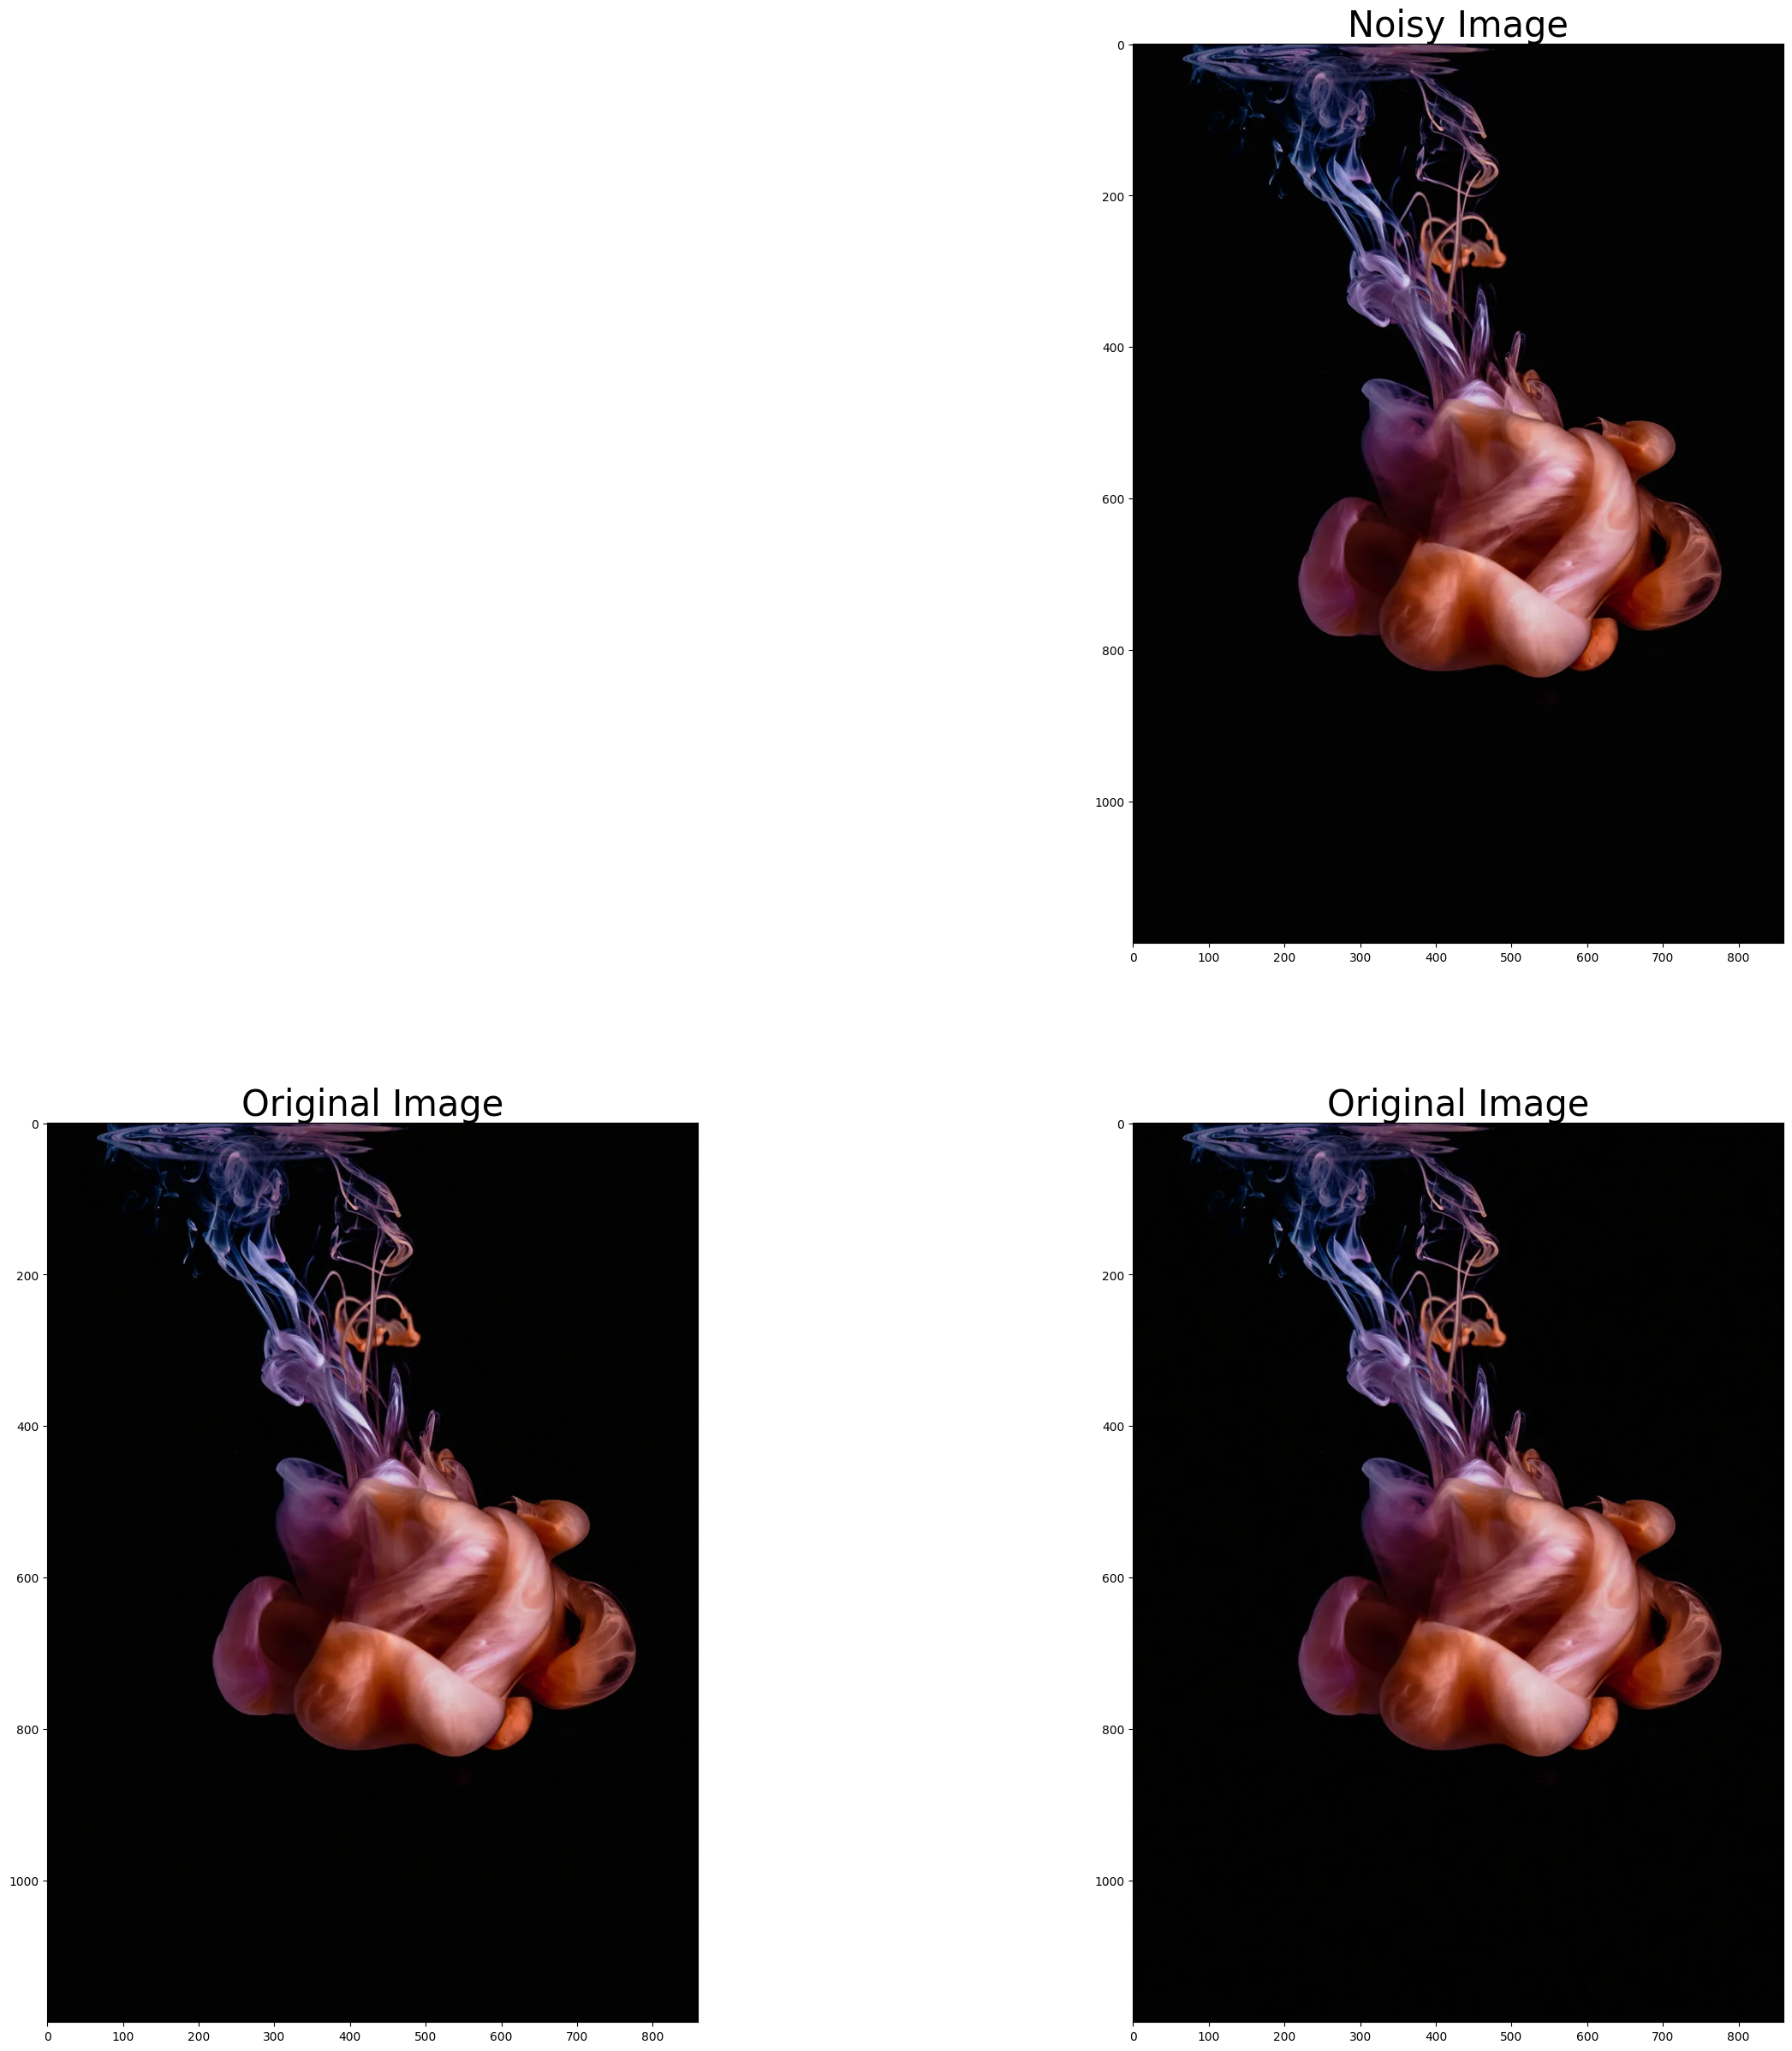

In [ ]:
# Plotting images
plt.figure(figsize=(30,30))

# plt.subplot(2,2,1)
# plt.imshow(img,cmap=plt.cm.gray)
# plt.title('Original Image',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(img_r,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.show()